In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from current font.
  plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
<ipython-input-2-99ecd12cc559>:69: UserWarning: Glyph 20540 

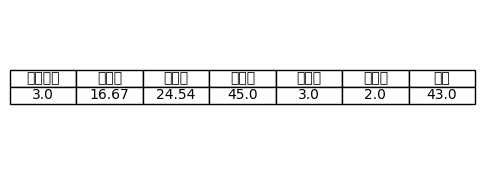

<ipython-input-2-99ecd12cc559>:76: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
<ipython-input-2-99ecd12cc559>:76: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from current font.
  plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
<ipython-input-2-99ecd12cc559>:76: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
<ipython-input-2-99ecd12cc559>:76: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
<ipython-input-2-99ecd12cc559>:76: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from current font.
  plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
<ipython-input-2-99ecd12cc559>:76: UserWarnin

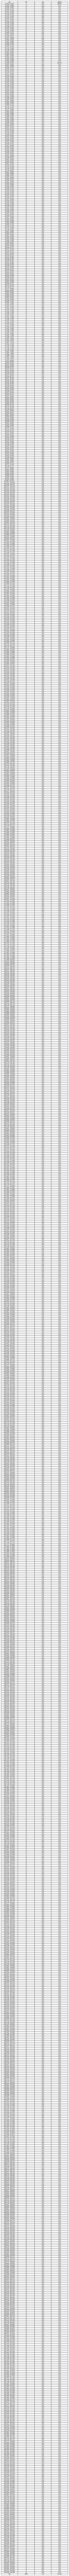

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体属性，确保中文显示
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

# 您的数据
data = [2,3,45
#    放入自己的数据,上面只是样例
]

# 将数据转换为 Pandas DataFrame
df = pd.DataFrame(data, columns=['Value'])

# 计算统计量
count = df['Value'].count()
mean = round(df['Value'].mean(), 2)
std = round(df['Value'].std(), 2)
max_value = round(df['Value'].max(), 2)
min_value = round(df['Value'].min(), 2)
median = round(df['Value'].median(), 2)
range_value = round(df['Value'].max() - df['Value'].min(), 2)

# 创建统计信息表格数据
stat_table_data = {
    '数据个数': [count],
    '平均值': [mean],
    '标准差': [std],
    '最大值': [max_value],
    '中间值': [median],
    '最小值': [min_value],
    '范围': [range_value]
}

stat_df_table = pd.DataFrame(stat_table_data)

# 合理划分区间间隔Δ，统计落在每个区间的频数（数据个数），并计算概率和概率密度（有单位）
intervals = np.arange(min_value, max_value, 0.03)  # 将数据分为以0.03为间隔的区间
interval_labels = [f"[{intervals[i]:.2f}, {intervals[i+1]:.2f})" for i in range(len(intervals)-1)]  # 区间标签

# 统计落在每个区间的频数
bin_counts = []
for i in range(len(intervals) - 1):
    count = len(df[(df['Value'] >= intervals[i]) & (df['Value'] < intervals[i+1])])
    bin_counts.append(count)

# 计算概率和概率密度
bin_probabilities = [round(count / sum(bin_counts), 2) for count in bin_counts]
bin_densities = [round((count / (intervals[i+1] - intervals[i])) / sum(bin_counts), 2) for i, count in enumerate(bin_counts)]
total_density = round(sum(bin_densities), 2)  # 合计概率密度

# 创建概率密度表格数据
density_table_data = {
    '区间': interval_labels + ['合计'],
    '频数': bin_counts + [200],
    # 这里加入的是统计数据总数
    '概率': bin_probabilities + [1],
    '概率密度': bin_densities + [total_density]
}

density_df_table = pd.DataFrame(density_table_data)

# 绘制统计信息表格
fig1, ax1 = plt.subplots(figsize=(6, 2))
ax1.axis('off')  # 不显示坐标轴
ax1.table(cellText=stat_df_table.values, colLabels=stat_df_table.columns, cellLoc='center', loc='center')
plt.savefig('stat_table.png', bbox_inches='tight')  # 保存统计信息表格为图片
plt.show()  # 显示统计信息表格

# 绘制概率密度表格
fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.axis('off')  # 不显示坐标轴
ax2.table(cellText=density_df_table.values, colLabels=density_df_table.columns, cellLoc='center', loc='center')
plt.savefig('density_table.png', bbox_inches='tight')  # 保存概率密度表格为图片
plt.show()  # 显示概率密度表格